# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Использовать необходимо данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


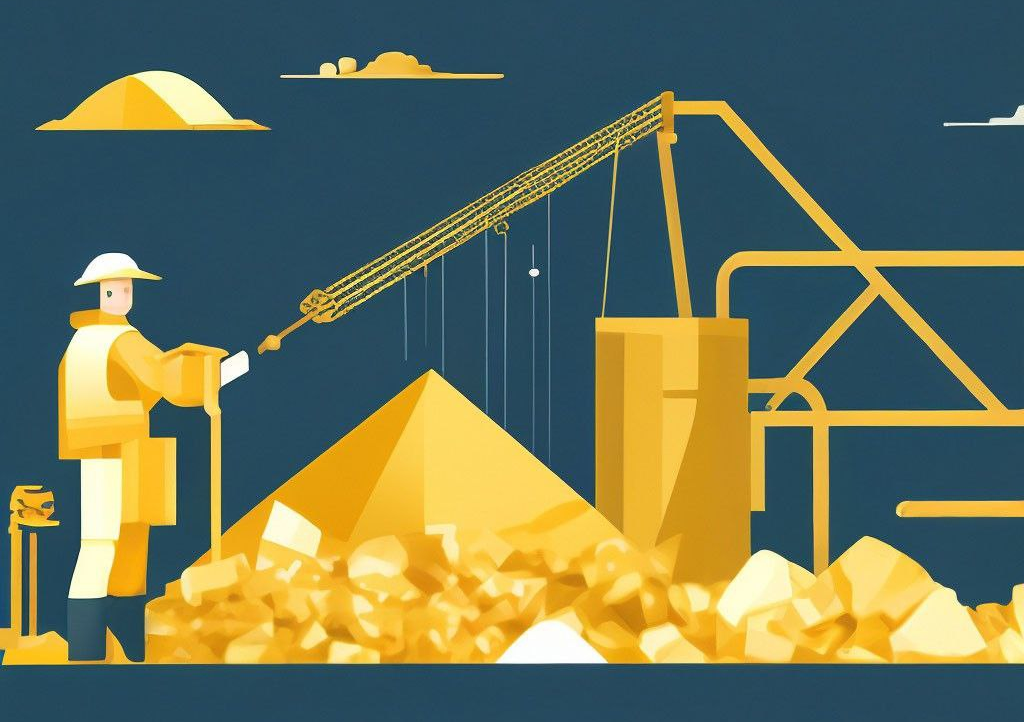

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первичный анализ</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подытог</a></span></li><li><span><a href="#Продолжение-первичного-анализа" data-toc-modified-id="Продолжение-первичного-анализа-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Продолжение первичного анализа</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрации-металлов" data-toc-modified-id="Концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрации металлов</a></span></li><li><span><a href="#Распределение-размеров-гранул" data-toc-modified-id="Распределение-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул</a></span></li><li><span><a href="#Суммарные-концентрации" data-toc-modified-id="Суммарные-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарные концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-вычисления-sMAPE" data-toc-modified-id="Функция-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция вычисления sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Подытог" data-toc-modified-id="Подытог-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подытог</a></span></li><li><span><a href="#Ограничение-обучающей-выборки" data-toc-modified-id="Ограничение-обучающей-выборки-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Ограничение обучающей выборки</a></span></li><li><span><a href="#Подключение-двух-моделей-и-разделение-данных" data-toc-modified-id="Подключение-двух-моделей-и-разделение-данных-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Подключение двух моделей и разделение данных</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

### Первичный анализ

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor #для проверки адекватности модели

from sklearn.model_selection import GridSearchCV #попробуем автоподбор параметров
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, make_scorer

from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor 
pd.options.mode.chained_assignment = None

    1. Флотация  
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

    2. Очистка   
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.  
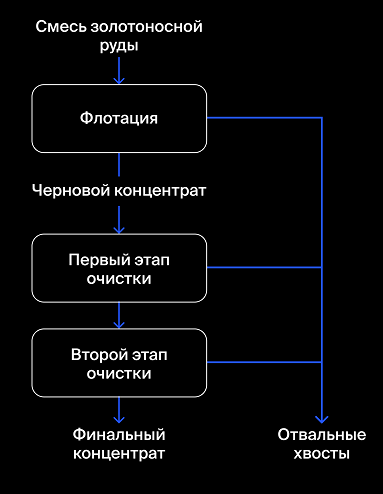

Данные находятся в трёх файлах:

    gold_recovery_train_new.csv — обучающая выборка;
    gold_recovery_test_new.csv — тестовая выборка;
    gold_recovery_full_new.csv — исходные данные.
    
Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.  
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

In [2]:
pd.set_option("display.precision", 7)

try:
    df_train = pd.read_csv('C://datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('C://datasets/gold_recovery_test_new.csv')
    df = pd.read_csv('C://datasets/gold_recovery_full_new.csv')

except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

display(df_train.info())
display(df_test.info())
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

 - Всего у нас 19439 строк, из них 14149 в тренировочной и 5290 в тестовой.
- Все значения - float64, дата - object. Сменим на дату.
   
    
В тренировочной и начальной выборке порядка 86 столбцов с данными (включая дату), в тестовой - 52.
    
Данные делятся на категории:
    
    final.output - финальная концентрация металлов, recovery и tail;
    
    primary_cleaner - input (sulfate,depressant,feed_size,xanthate) - данные по подаче, output (концентрация и хвост), state(floatbank8) на этапе первой очистке;
    
    rougher.calculation - расчетные значения на этапе флотации;
    
    rougher.input - содержит значения feed (те же au, pb, sol, au и feed скорость и размер) и floatbank (с 10 и 11 подается sulfate и xanthate) на этапе флотации;
    
    rougher.output - выход веществ концентрация металлов, recovery и tail после флотации;
    
    rougher.state - информация про floatbank10, air и level на этапе флотации;
    
    secondary_cleaner - output (хвост все тех же au, pb, sol, au) и state 2,3,4,5,6 floatbank'ов.
    
    
В тестовой выборке:
    
    primary_cleaner - input (sulfate,depressant,feed_size,xanthate) - данные по подаче химии(?), state(floatbank8);
        output (концентрация и хвост) - отсутствует
    
    rougher.input - содержит значения feed (те же au, pb, sol, au и feed скорость и размер) и floatbank (с 10 и 11 подается sulfate и xanthate) - видимо сухие и жидкие материалы;
        
    rougher.state - информация про floatbank10, air и level;
    
    secondary_cleaner.state 2,3,4,5,6 floatbank'ов.
    
Отсутствуют в тестовой выборке: 
    
    Все виды output и calculation


In [3]:
df_train.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
14144,2018-08-18 06:59:59,3.2249204,11.3562331,6.8034821,46.7139535,73.7551497,8.7696452,3.1415409,10.4031806,1.5292201,...,23.0314968,-501.1679418,20.0075710,-499.7400281,18.0060376,-499.8343737,13.0011144,-500.1556941,20.0078401,-501.2964279
14145,2018-08-18 07:59:59,3.1959783,11.3493545,6.8622487,46.8667799,69.0492906,8.8973214,3.1304934,10.5494700,1.6125417,...,22.9600949,-501.6127827,20.0356604,-500.2513568,17.9985346,-500.3951782,12.9540478,-499.8951626,19.9684976,-501.0416079
14146,2018-08-18 08:59:59,3.1099975,11.4343660,6.8860131,46.7956910,67.0021889,8.5296061,2.9114184,11.1151467,1.5966158,...,23.0157185,-501.7115993,19.9512312,-499.8570271,18.0195434,-500.4511560,13.0234308,-499.9143907,19.9908851,-501.5184520
14147,2018-08-18 09:59:59,3.3672410,11.6255873,6.7994326,46.4081877,65.5232462,8.7771713,2.8192145,10.4638475,1.6028790,...,23.0249629,-501.1534093,20.0541215,-500.3147109,17.9795150,-499.2728713,12.9924035,-499.9762678,20.0139858,-500.6254706
14148,2018-08-18 10:59:59,3.5983749,11.7378318,6.7175095,46.2994381,70.2814542,8.4066897,2.5175180,10.6521933,1.3894343,...,23.0186224,-500.4927023,20.0202048,-500.2202957,17.9635116,-499.9394899,12.9903059,-500.0809934,19.9903355,-499.1915746


In [4]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.0000000,14148.0000000,13938.0000000,14149.0000000,14149.0000000,14149.0000000,14049.0000000,14144.0000000,14149.0000000,14129.0000000,...,14143.0000000,14148.0000000,14148.0000000,14148.0000000,14148.0000000,14148.0000000,14148.0000000,14148.0000000,14147.0000000,14148.0000000
mean,5.1420336,10.1329597,9.2028492,44.0037916,66.5188321,9.6070350,2.5972980,10.5121222,2.9184208,133.3206589,...,19.9854542,-478.6968357,15.4870653,-460.2294159,16.7751360,-483.9560224,13.0645898,-483.9665643,19.5775394,-506.7984803
std,1.3695856,1.6549302,2.7905165,4.9052608,10.2954015,2.3190692,0.9718428,3.0036168,0.9037124,39.4316585,...,5.6577228,50.7360206,5.2556548,58.8435858,5.8319060,37.8927880,5.7656172,39.2079133,5.7644171,37.0792493
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0031118,...,0.0000000,-799.7090691,0.0000000,-799.8891125,-0.3720540,-797.1424746,0.6462077,-800.0061798,0.1953243,-809.3986675
25%,4.2116198,9.2973545,7.4846452,43.2761109,62.5458168,7.9974286,1.9059726,8.8113245,2.3686073,107.0066508,...,14.9907753,-500.6286565,11.8945578,-500.1490002,11.0839797,-500.3631772,8.9944049,-500.1059939,14.9893040,-500.7451042
50%,4.9946519,10.2971444,8.8454620,44.8724359,67.4327755,9.4802701,2.5920220,10.5146210,2.8510253,133.0183278,...,20.0017891,-499.6814499,14.9755364,-499.3887377,17.9322231,-499.7024517,11.9975465,-499.9145557,19.9841754,-500.0614314
75%,5.8595398,11.1706033,10.4875079,46.1664248,72.3464284,11.0037072,3.2417233,11.9330085,3.4347644,159.8253962,...,24.9908265,-477.4724133,20.0593748,-400.0390081,21.3465502,-487.7121081,17.9829035,-453.1869364,24.9916225,-499.5364657
max,16.0019451,17.0318995,18.1248509,52.7566376,100.0000000,19.5521486,5.6395650,22.3177303,8.1974082,250.1278341,...,30.1157354,-245.2391837,24.0079127,-145.0710881,43.7099310,-275.0731255,27.9260014,-157.3960709,32.1889057,-104.4274592


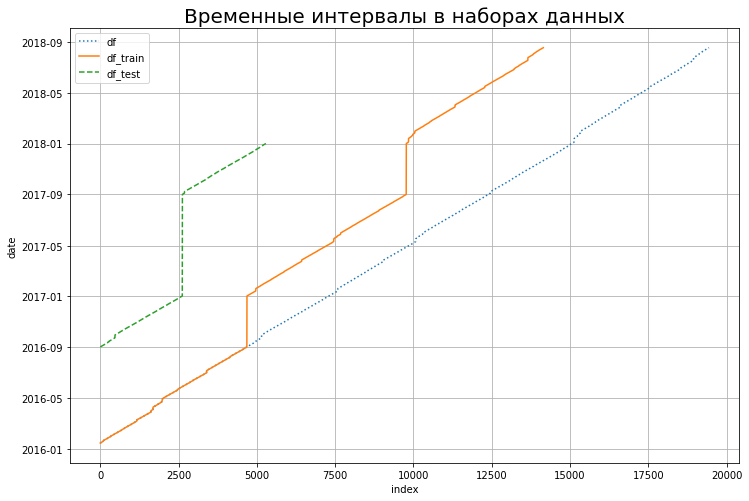

In [5]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['date'].plot(xlabel = 'index', ylabel = 'date', legend = True,  linestyle=':')
df_train['date'].plot(legend = True)
df_test['date'].plot(grid = True, figsize = (12,8), legend = True,  linestyle='--')
plt.legend(['df', 'df_train', 'df_test'])
plt.title('Временные интервалы в наборах данных', fontsize = 20)
plt.show()

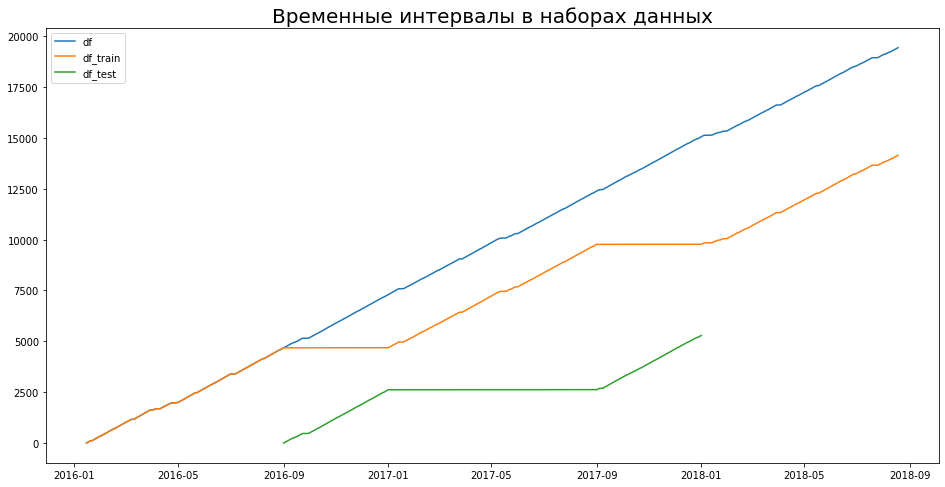

In [6]:
plt.figure(figsize=(16, 8))
plt.title('Временные интервалы в наборах данных', fontsize = 20)
plt.plot(df['date'], df.index.to_series())#, xlabel = 'indlex', ylabel = 'date', legend = True,  linestyle=':')
plt.plot(df_train['date'], df_train.index.to_series())
plt.plot(df_test['date'], df_test.index.to_series())
plt.legend(['df', 'df_train', 'df_test'])
plt.show()

- Сменили тип данных на "дата". Остальные все численные значения float, и они действительно float.
    
- Тестовая выборка содержит периоды работы с 09.2016 - 01.2017 и 09.2017 - 01.2017.
- Тренировочная выборка содержит все остальные данные.
    
Очень плохо, что тестовая выборка содержит именно 2 одинаковых сезона с сентября по декабрь. В то же время учебная выборка совем не содержит этих данных. Если в производстве присутствует сезонность - качество модели не может быть высоким в принципе.
    
Так же стоит отметить, что у всех наборов индексы начинаются с нуля и идут подряд. Т.е. для совмещения и взаимопроверки надо будет сравнивать по дате. 

<b>    Учитывая, что у нас есть генеральная совокупность в df, можно проверить различается ли целевой признак в разные временные интервалы относительно общего. </b>

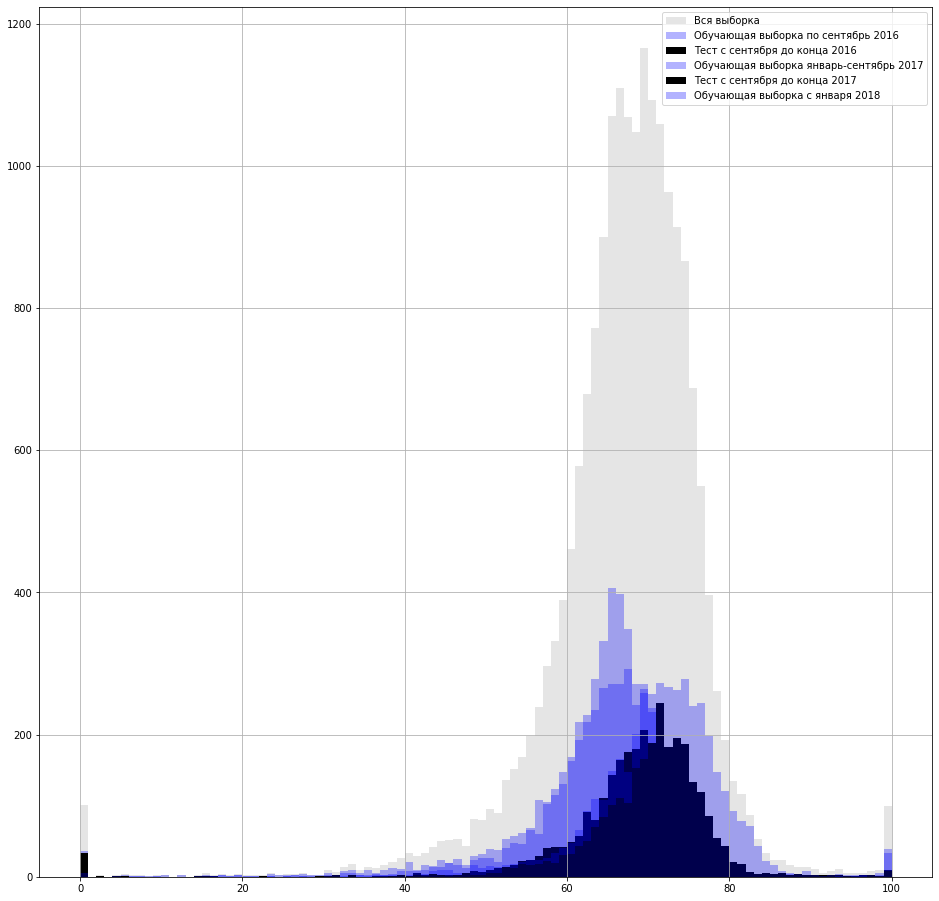

In [7]:
ax = df['final.output.recovery'].hist(bins = 100, alpha = 0.1, figsize = (16,16),legend = True, color = 'black')
df.query('date < "2016-09"')['final.output.recovery'].hist(bins = 100, alpha = 0.3, legend = True, color = 'blue')
df.query('"2016-09" < date < "2017-01"')['final.output.recovery'].hist(bins = 100, alpha = 1, 
                                                                       legend = True, color = 'black')
df.query('"2017-01" < date < "2017-09"')['final.output.recovery'].hist(bins = 100, alpha = 0.3, 
                                                                       legend = True, color = 'blue')
df.query('"2017-09" < date < "2018-01"')['final.output.recovery'].hist(bins = 100, alpha = 1, 
                                                                       legend = True, color = 'black')
df.query('"2018-01" < date')['final.output.recovery'].hist(bins = 100, alpha = 0.3, 
                                                                       legend = True, color = 'blue')
ax.legend(['Вся выборка',
           'Обучающая выборка по сентябрь 2016',
           'Тест с сентября до конца 2016',
           'Обучающая выборка январь-сентябрь 2017',
           'Тест с сентября до конца 2017',
           'Обучающая выборка с января 2018'
          ])
None

In [8]:
train1 = df.query('date < "2016-09"')['final.output.recovery']
test1 = df.query('"2016-09" < date < "2017-01"')['final.output.recovery']
train2 = df.query('"2017-01" < date < "2017-09"')['final.output.recovery']
test2 = df.query('"2017-09" < date < "2018-01"')['final.output.recovery']
train3 = df.query('"2018-01" < date')['final.output.recovery']

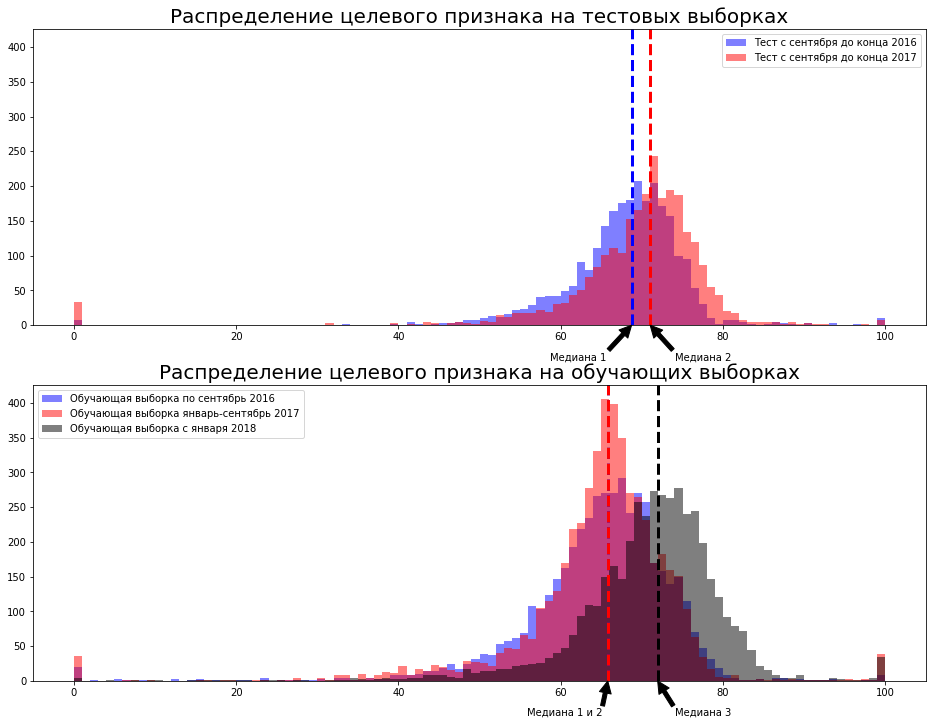

In [9]:
fig, ax = plt.subplots(2,1, figsize = (16,12), sharex=False, sharey=True)
#Выборки с теста
ax[0].hist(test1, bins = 100, alpha = 0.5, color = 'b')
ax[0].hist(test2, bins = 100, alpha = 0.5, color = 'r')
ax[0].legend(['Тест с сентября до конца 2016',
           'Тест с сентября до конца 2017'
          ])
ax[0].axvline(test1.median(), color='b', linestyle='dashed', linewidth=3)
ax[0].axvline(test2.median(), color='r', linestyle='dashed', linewidth=3)


ax[1].hist(train1, bins = 100, alpha = 0.5, color = 'b')
ax[1].hist(train2, bins = 100, alpha = 0.5, color = 'r')
ax[1].hist(train3, bins = 100, alpha = 0.5, color = 'k')
ax[1].legend(['Обучающая выборка по сентябрь 2016',
           'Обучающая выборка январь-сентябрь 2017',
           'Обучающая выборка с января 2018'
          ])
ax[1].axvline(train1.median(), color='b', linestyle='dashed', linewidth=3)
ax[1].axvline(train2.median(), color='r', linestyle='dashed', linewidth=3)
ax[1].axvline(train3.median(), color='k', linestyle='dashed', linewidth=3)
ax[0].annotate('Медиана 1', 
            xy=(test1.median(), 0), 
            xytext=(test1.median()-10, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[0].annotate('Медиана 2', 
            xy=(test2.median(), 0), 
            xytext=(test2.median()+3, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[1].annotate('Медиана 1 и 2', 
            xy=(train1.median(), 0), 
            xytext=(train1.median()-10, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[1].annotate('Медиана 3', 
            xy=(train3.median(), 0), 
            xytext=(test2.median()+3, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[0].set_title('Распределение целевого признака на тестовых выборках', fontsize = 20)
ax[1].set_title('Распределение целевого признака на обучающих выборках', fontsize = 20)
None

- Проверим, являются ли различия в  тестовых и обучающих выборках целевого признака статистически значимыми;
- Нулевая гипотеза будет, что выборки не различаются;
- Альтернативная - что в выборках есть статистически значимые различия целевого признака.

In [10]:
alpha = 0.05
for x in [test1,test2]:
    for y in [train1,train2,train3]:
        results = st.ttest_ind(x, 
                       y,
                       equal_var = False)
        if (results.pvalue < alpha):
            print(f"Отвергаем нулевую гипотезу ", 'P-value:', results.pvalue)
        else:
            print(f"Не получилось отвергнуть нулевую гипотезу", 'P-value:', results.pvalue)
        
    

Отвергаем нулевую гипотезу  P-value: 5.964605820600448e-51
Отвергаем нулевую гипотезу  P-value: 3.5616379109897744e-46
Отвергаем нулевую гипотезу  P-value: 3.366882492169259e-47
Отвергаем нулевую гипотезу  P-value: 6.397034868310984e-75
Отвергаем нулевую гипотезу  P-value: 4.7029083068739285e-70
Отвергаем нулевую гипотезу  P-value: 1.0506659512891621e-10


### Подытог
    Целевой признак по разному распределен в разные отрезки выборки, а тестовые и обучающие наборы имеют значимые статичтические различия между собой. Во время производства постепенно происходили улучшения. При этом первый обучающий набор хуже всех остальных. Очевидно, что для треннировки модели необходимо разделить выборки на несколько частей:


- Обучающую на 3 части, а тестовую на две;
- Первую обучающую часть стоит откинуть;
- Вторую обучающую выборку взять для первой тестовой выборки;
- Третью обучающую часть взять для второй тестовой выборки.

### Продолжение первичного анализа

Далее:
    
       Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
    


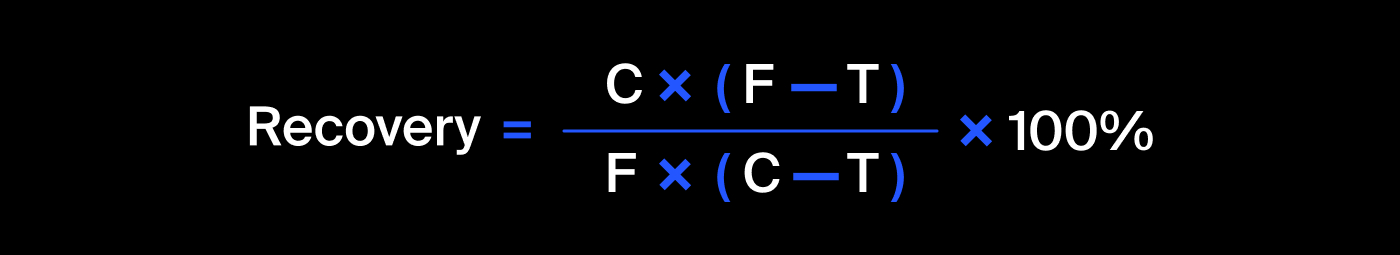


C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

In [11]:
def calc_recovery (C, F, T):
    
    result = (C*(F-T))/(F*(C-T))*100
    
    return result

In [12]:
df_train['rougher.output.recovery2'] = calc_recovery(df_train['rougher.output.concentrate_au'],
                                                    df_train['rougher.input.feed_au'],df_train['rougher.output.tail_au'])
df['rougher.output.recovery2'] = calc_recovery(df['rougher.output.concentrate_au'],
                                                    df['rougher.input.feed_au'],df['rougher.output.tail_au'])

In [13]:
print(mean_absolute_error(df_train['rougher.output.recovery'],df_train['rougher.output.recovery2']))
print(mean_absolute_error(df['rougher.output.recovery'],df['rougher.output.recovery2']))

9.73512347450521e-15
9.874045668302637e-15


- MSE крайне низкий, ошибка в накапливается в пятнадцатом знаке, после запятой. Связана, очевидно, с ошибкой округления;
- В обоих датасетах расчет концентрации произведен правильно;
- Удалим созданные столбцы.

In [14]:
df.drop('rougher.output.recovery2', axis = 1, inplace = True)
df_train.drop('rougher.output.recovery2', axis = 1, inplace = True)

- Проанализируем признаки, недоступные в тестовой выборке:  
    Что это за параметры?  
    К какому типу относятся?




In [15]:
train_list = df_train.columns
test_list = df_test.columns

for column in df_train:
    if column not in df_test.columns:
        print(column)


final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

- В тестовой выборке отсутствуют все output и calculation. 
- Т.е. есть только входные данные без замеров выходных и калькуляций. 
- Получается, тот самый recovery на тестовой выборке мы посчитать не сможем, потому что все output лежат только в полном наборе. 
- Соответственно и обучать по этим признакам смысла нет.

    Необходимо провести предобработку данных.


In [16]:
print(df.isna().sum().sort_values(ascending = False).head(40))

secondary_cleaner.output.tail_sol                     1748
rougher.input.floatbank11_xanthate                     453
rougher.state.floatbank10_e_air                        436
primary_cleaner.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air               220
final.output.concentrate_sol                           211
rougher.input.feed_size                                145
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.input.xanthate                         104
final.output.tail_pb                                   101
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
primary_cleaner.output.tail_sol                         62
rougher.input.floatbank11_sulfate                       44
primary_cleaner.input.depressant                        37
rougher.input.floatbank10_sulfate                       34
primary_cleaner.input.sulfate                           

In [17]:
print(df_train.isna().sum().sort_values(ascending = False).head(30))

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
rougher.input.floatbank10_sulfate             29
rougher.output.concentrate_sol                22
secondary_cleaner.state.floatbank2_b_air      21
primary_cleaner.input.sulfate                 20
primary_cleaner.output.tail_pb                15
secondary_cleaner.ou

In [18]:
print(df_test.isna().sum().sort_values(ascending = False).head(30))

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st

   
- Учитывая, что в учебной выборке находится 1605 из 1748 значений secondary_cleaner.output.tail_sol, возможно они идут один за другим. В тот момент мог сломаться какой-то датчик. Посмотрим интервал на графике.


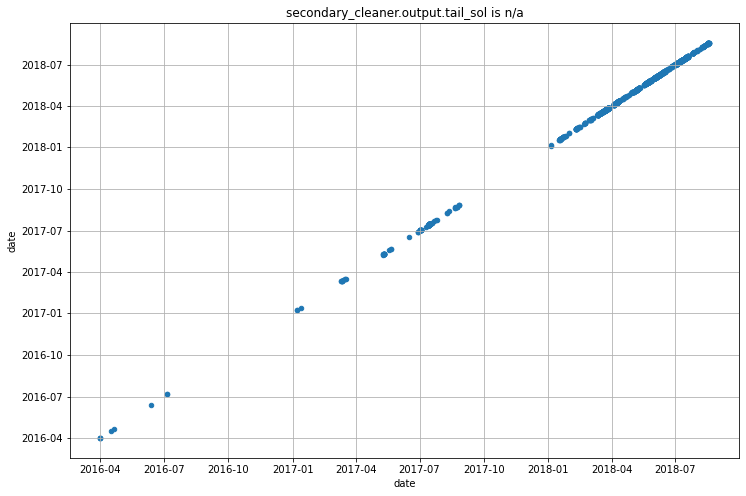

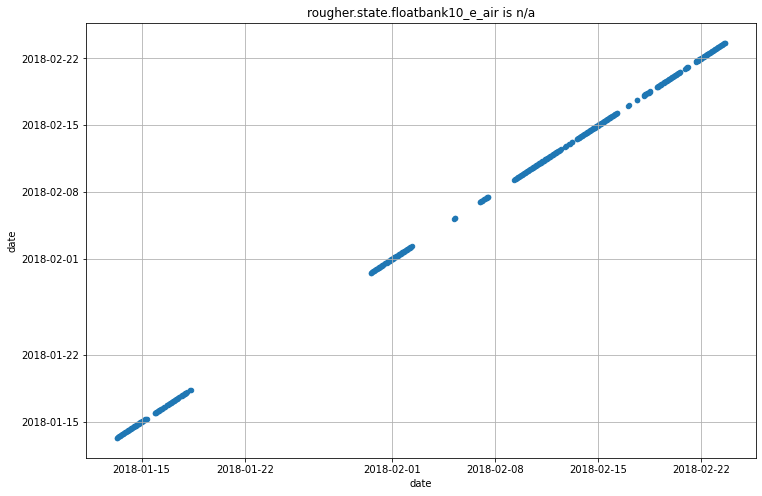

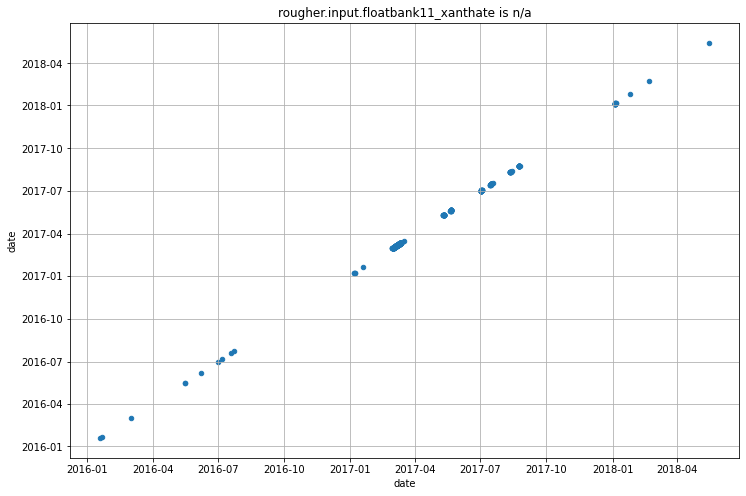

In [19]:
df_train[df_train['secondary_cleaner.output.tail_sol'].isna()].loc[:, 'date':'primary_cleaner.input.sulfate'].plot(
    kind = 'scatter', x = 'date', y = 'date',figsize = (12,8), grid= True, title = 'secondary_cleaner.output.tail_sol is n/a')
#не мог на series сделать scatter, пришлось делать loc и выделять две колонки, чтобы вывести пропущенные отрезки

df_train[df_train['rougher.state.floatbank10_e_air'].isna()].loc[:, 'date':'primary_cleaner.input.sulfate'].plot(
    kind = 'scatter', x = 'date', y = 'date',figsize = (12,8), grid= True, title = 'rougher.state.floatbank10_e_air is n/a')

df_train[df_train['rougher.input.floatbank11_xanthate'].isna()].loc[:, 'date':'primary_cleaner.input.sulfate'].plot(
    kind = 'scatter', x = 'date', y = 'date',figsize = (12,8), grid= True, title = 'rougher.input.floatbank11_xanthate is n/a')
plt.show()

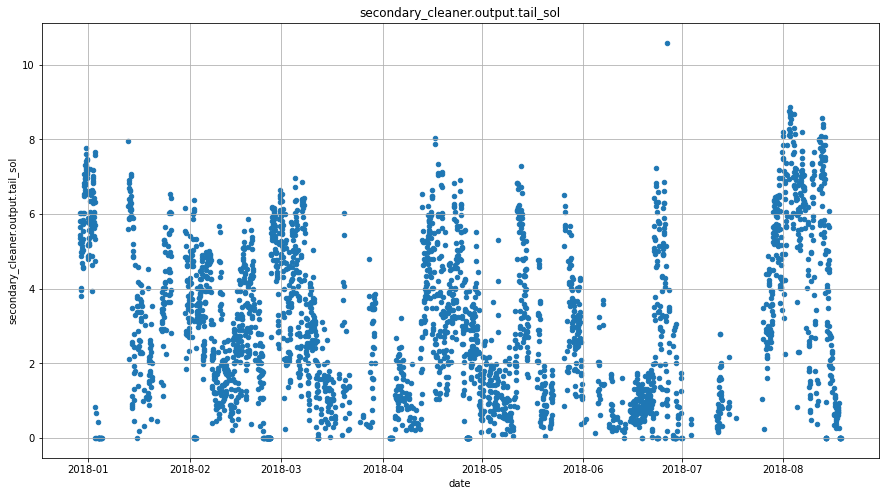

In [20]:
df[15000:20000].plot(x = 'date', y = 'secondary_cleaner.output.tail_sol', kind = 'scatter', figsize = (15,8), grid= True, 
                     title = 'secondary_cleaner.output.tail_sol')
None

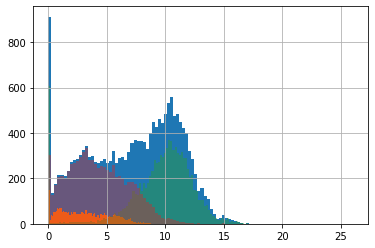

In [21]:
df['secondary_cleaner.output.tail_sol'].hist(bins = 100)
df['secondary_cleaner.output.tail_sol'][15000:20000].hist(bins = 100)
df['secondary_cleaner.output.tail_sol'][:10000].hist(bins = 100, alpha = 0.4)
df['secondary_cleaner.output.tail_sol'][10000:].hist(bins = 100, alpha = 0.4)
None

- Видно, что данные со временем кардинально меняются;
- Очевидно, происходила определенная оптимизация процесса, при котором менялись добавки различных реагентов.

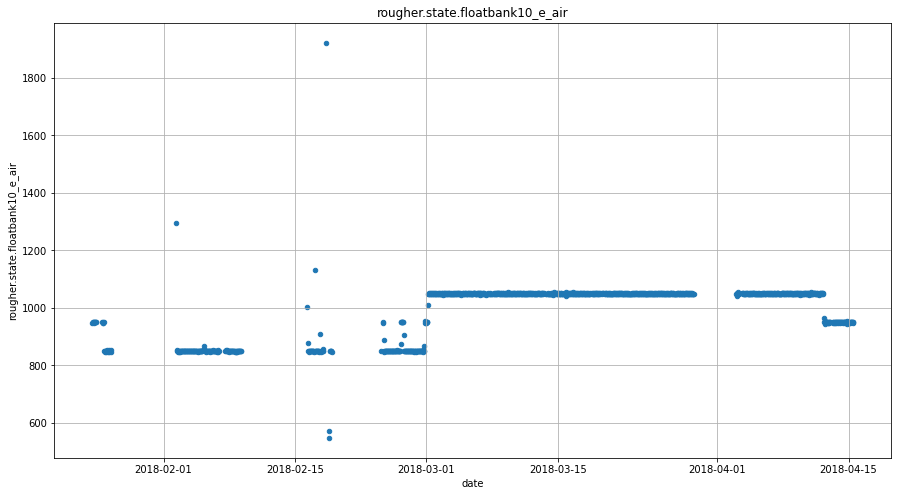

In [22]:
df[15300:16900].plot(x = 'date', y = 'rougher.state.floatbank10_e_air', kind = 'scatter', figsize = (15,8), grid= True, 
                     title = 'rougher.state.floatbank10_e_air')
None

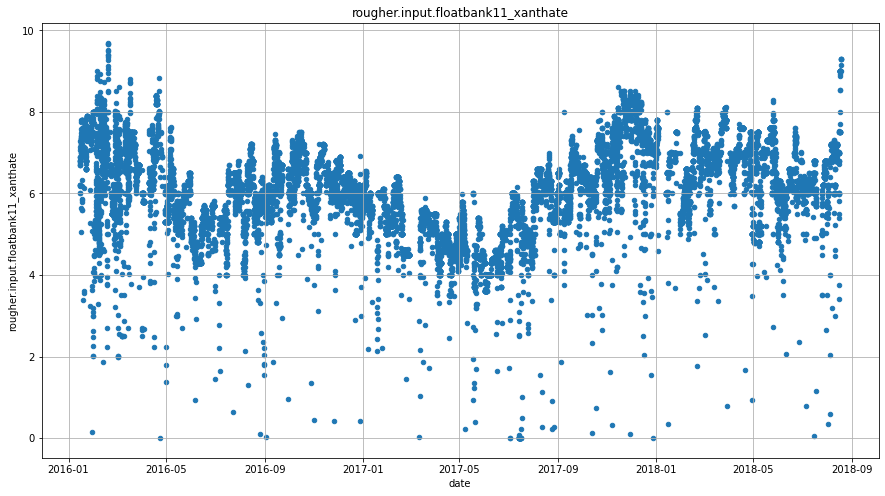

In [23]:
df.plot(x = 'date', y = 'rougher.input.floatbank11_xanthate', kind = 'scatter', figsize = (15,8), grid= True, 
                     title = 'rougher.input.floatbank11_xanthate')
None

- Технологический процесс помимо огромного числа флуктуаций, ещё и содержит существенные изменения со временем. И это мы имеем ежечасные замеры;
    
- В данном случае пропуски заменить пропуски на нули будет некорректно;

- В описании задачи у заказчика было указано, что технологические процессы по времени меняются медленно и отсутствующие значения чаще всего соответствуют рядом стоящим;

- Отсюда самым корректным будет интерполировать данные.

In [24]:
df['week'] = df['date'].dt.isocalendar().week.astype('int64')
df['month']= df['date'].dt.month.astype('int64')
df['year']= df['date'].dt.year.astype('int64')

In [25]:
df = df.interpolate('pad')
df_train = df_train.interpolate('pad')
df_test = df_test.interpolate('pad')

In [26]:
df_train['week'] = df_train['date'].dt.isocalendar().week.astype('int64')
df_train['month']= df_train['date'].dt.month.astype('int64')
df_train['year']= df_train['date'].dt.year.astype('int64')
df_test['week'] = df_test['date'].dt.isocalendar().week.astype('int64')
df_test['month']= df_test['date'].dt.month.astype('int64')
df_test['year']= df_test['date'].dt.year.astype('int64')

- Пропуски заполнены, задания выполнены, данные подготовлены для дальнейшего анализа.


## Анализ данных

### Концентрации металлов

Посмтрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

Этапы - 
    
    rougher, primary_cleaner, final 
    
Конецентрации:

    .output.concentrate_ag
    .output.concentrate_pb 
    .output.concentrate_sol
    .output.concentrate_au      
     
</div>

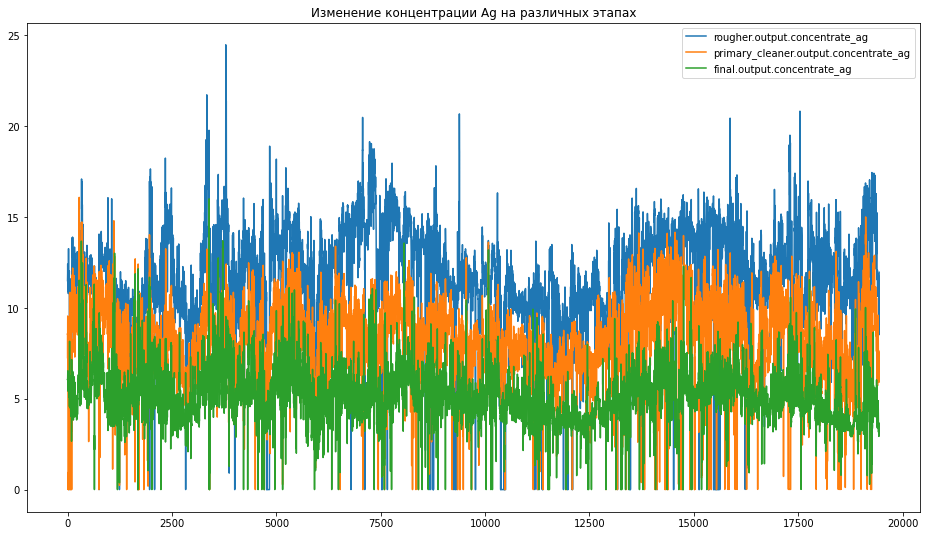

In [27]:
df.plot(legend = True, figsize = (16, 9), y = ['rougher.output.concentrate_ag',
                                               'primary_cleaner.output.concentrate_ag',
                                               'final.output.concentrate_ag'
                                              ])

plt.title('Изменение концентрации Ag на различных этапах')
plt.show()

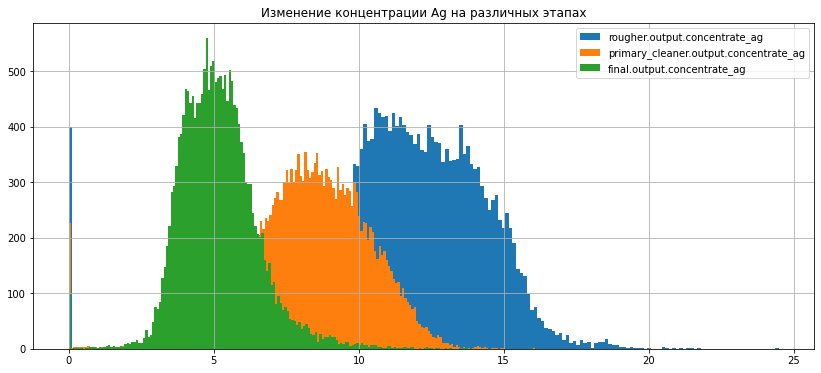

In [28]:
df['rougher.output.concentrate_ag'].hist(bins = 200, figsize=(14, 6), legend = True)
df['primary_cleaner.output.concentrate_ag'].hist(bins = 200, legend = True)
df['final.output.concentrate_ag'].hist(bins = 200, legend = True)

plt.title('Изменение концентрации Ag на различных этапах')
plt.show()

- Концентрация серебра в среднем в руде после флотации - 12 (попугаев/удав); 
- После первичной очистки остается лишь 70% - 8.5 (попугаев/удав); 
- После вторичной очистки остается 40% от изначального или 5 (попугаев/удав);
- Очевидно, постепенно серебро из руды вымывают.
    
    Стоит отметить, что распределение концентраций - нормально распределено, а стандартное отклонение после всех очисток у распределения снижается. Т.е. конечная концентрация более "стандартизирована".


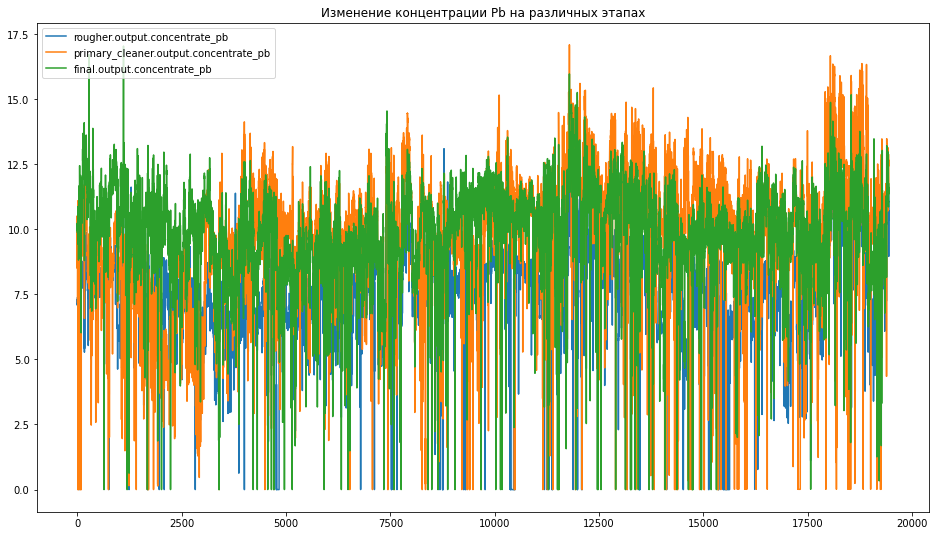

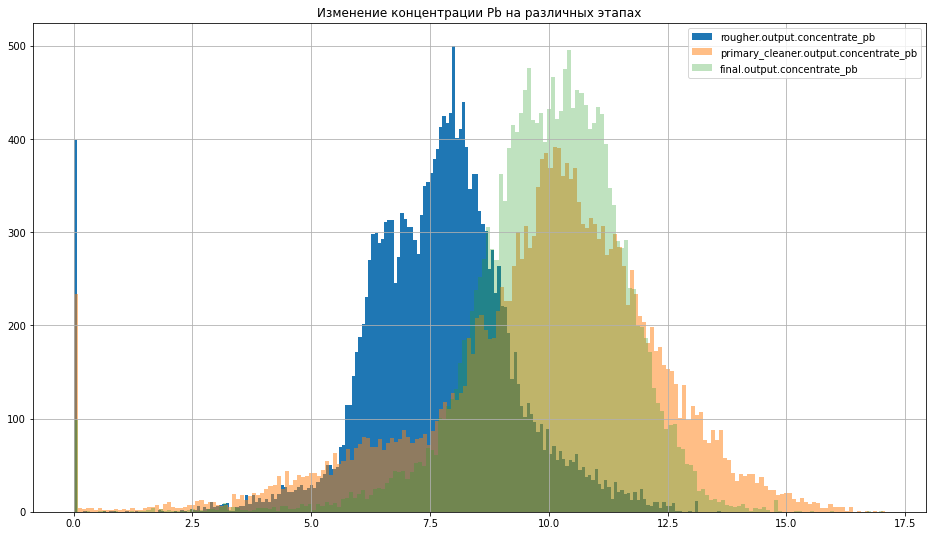

In [29]:
df.plot(legend = True, figsize = (16, 9), y = ['rougher.output.concentrate_pb',
                                               'primary_cleaner.output.concentrate_pb',
                                               'final.output.concentrate_pb'
                                              ])

plt.title('Изменение концентрации Pb на различных этапах')
plt.show()

df['rougher.output.concentrate_pb'].hist(bins = 200, figsize=(16, 9), legend = True)
df['primary_cleaner.output.concentrate_pb'].hist(bins = 200, alpha = 0.5, legend = True)
df['final.output.concentrate_pb'].hist(bins = 200, alpha = 0.3, legend = True)
plt.title('Изменение концентрации Pb на различных этапах')
plt.show()

- Концентрация свинца в среднем в руде после флотации - 7,7 попугаев/удав;
- После первичной очистки она увеличивается в среднем на 30% до 10.1 попугаев/удав;
- После вторичной очистки в среднем остается такой же - 10.1 попугаев/удав.

    Стоит отметить, что распределение концентраций - нормально распределено, а стандартное отклонение после всех очисток у распределения снижается. Т.е. конечная концентрация более "стандартизирована".
    
</div>

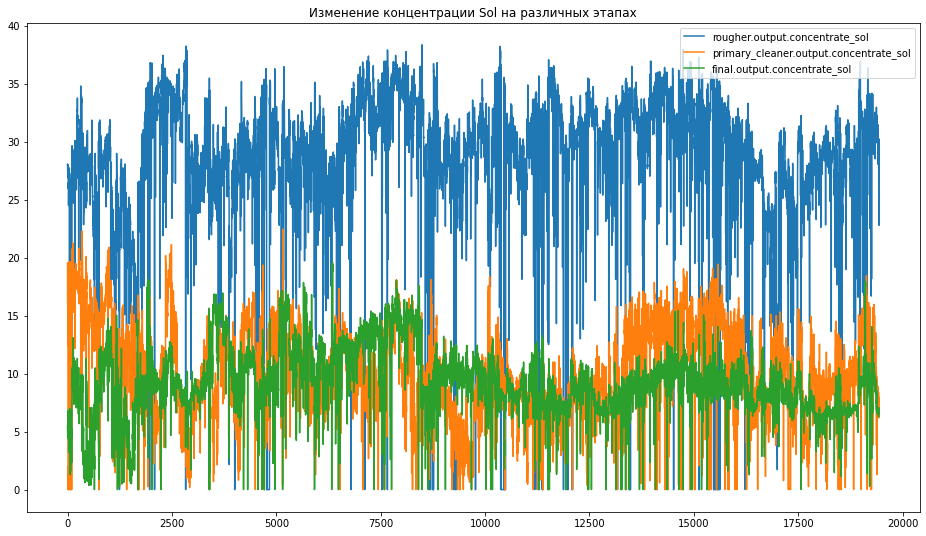

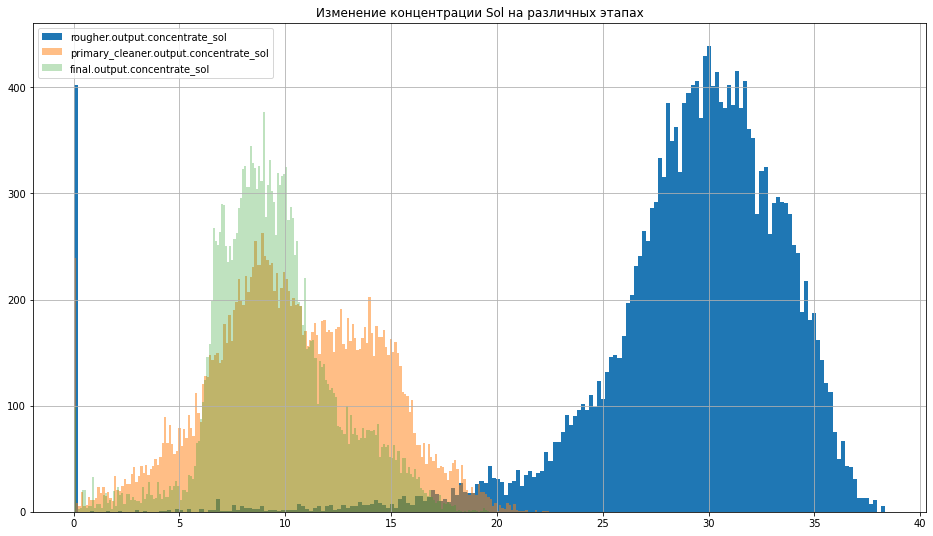

In [30]:
df.plot(legend = True, figsize = (16, 9), y = ['rougher.output.concentrate_sol',
                                               'primary_cleaner.output.concentrate_sol',
                                               'final.output.concentrate_sol'
                                              ])

plt.title('Изменение концентрации Sol на различных этапах')
plt.show()

df['rougher.output.concentrate_sol'].hist(bins = 200, figsize=(16, 9), legend = True)
df['primary_cleaner.output.concentrate_sol'].hist(bins = 200, alpha = 0.5, legend = True)
df['final.output.concentrate_sol'].hist(bins = 200, alpha = 0.3, legend = True)
plt.title('Изменение концентрации Sol на различных этапах')
plt.show()

- Концентрация неизвестой sol в среднем в руде после флотации - 29 попугаев/удав;
- После первичной очистки она снижается в среднем в три раза до 10.3 попугаев/удав;
- После вторичной очистки снижается ещё на 10% в среднем - 9.2 попугаев/удав.

    Стоит отметить, что распределение концентраций - нормально распределено, а стандартное отклонение после всех очисток у распределения снижается. Т.е. конечная концентрация более "стандартизирована".
    

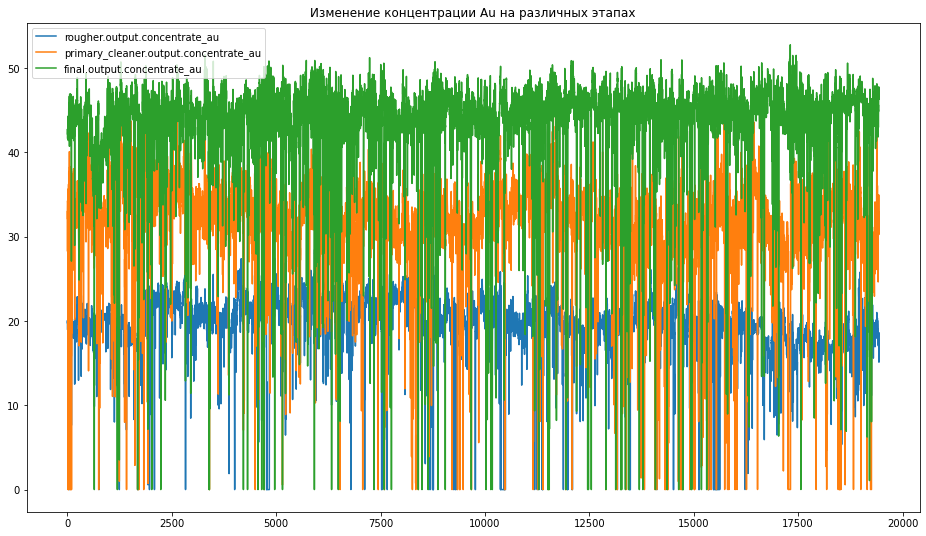

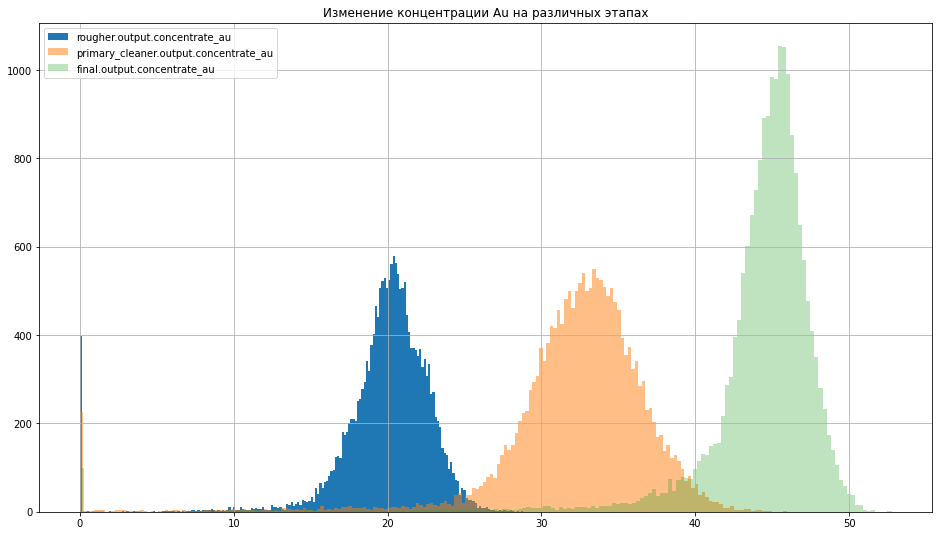

In [31]:
df.plot(legend = True, figsize = (16, 9), y = ['rougher.output.concentrate_au',
                                               'primary_cleaner.output.concentrate_au',
                                               'final.output.concentrate_au'
                                              ])

plt.title('Изменение концентрации Au на различных этапах')
plt.show()

df['rougher.output.concentrate_au'].hist(bins = 200, figsize=(16, 9), legend = True)
df['primary_cleaner.output.concentrate_au'].hist(bins = 200, alpha = 0.5, legend = True)
df['final.output.concentrate_au'].hist(bins = 200, alpha = 0.3, legend = True)
plt.title('Изменение концентрации Au на различных этапах')
plt.show()

- Концентрация золота в среднем в руде после флотации - 20 попугаев/удав;
- После первичной очистки она вырастает в среднем на 65%, до 33 попугаев/удав;
- После вторичной очистки увеличивает ещё на 35% в среднем - до 45 попугаев/удав.
    
    В связи с тем, что филосовский камень так и не был изобретен, получается что если концентрация растет, то просто объем изначального материала снижается. Получается, что концентрация вырастает в 2.25 раза, значит объем изначального материала (предположительно руды) снижается на этапах подготовки более чем в 2.5 раза.

In [32]:
df[df['final.output.concentrate_au'] < df['rougher.output.concentrate_au']][['final.output.concentrate_au', 'rougher.output.concentrate_au']]

,final.output.concentrate_au,rougher.output.concentrate_au
643,12.7189235,12.8156112
644,0.0000000,15.9351897
647,12.3500793,16.2971894
1191,11.3156015,18.6308873
1193,0.0000000,18.6821622
...,...,...
19154,19.8807701,22.9043336
19209,1.0639915,24.4853721
19257,15.6850095,20.0536246
19258,8.0441105,21.8278142


- В 183 случае конечная концентрация золота меньше, чем начальная. Либо это грубые ошибки замеров, либо это грубые ошибки в операции. Данные страныне, но удалять их мы не имеем права.

In [33]:
df[df['final.output.concentrate_ag'] > df['rougher.output.concentrate_ag']][['final.output.concentrate_ag', 'rougher.output.concentrate_ag']]

,final.output.concentrate_ag,rougher.output.concentrate_ag
45,4.5666636,0.0000000
46,4.5778325,0.0000000
47,4.5914617,0.0000000
48,5.2968301,0.0000000
49,8.1628963,0.0000000
...,...,...
17352,7.5876346,6.8576322
17368,7.6726560,4.7502136
17482,5.5634419,5.5143463
17769,11.5513039,11.4312016


- В 453 случае конечная концентрация серебра выше, чем начальная;

- Очевидно, что выявленные нами закономерности по изменению концентрации элементов не всегда следуют этому правилу. Иногде концентрации могут расти, вместо падения или падать вместо роста. Но такие случаи не массовые.

- Видно, что по мере прохождения технологического процесса доля золота `Au` в концентрате значительно растет, доля серебра `Ag` падает (в основном на второй очистки), доля свинца `Pb` растет (в основном на этапе флотации).

### Распределение размеров гранул

    Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

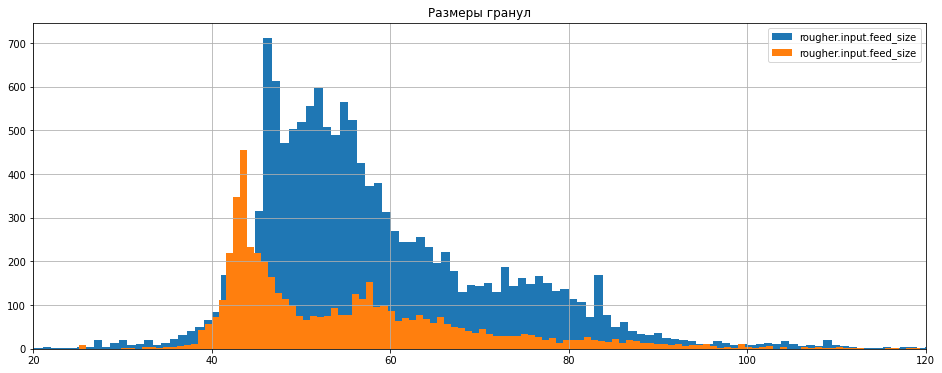

In [34]:
df_train['rougher.input.feed_size'].hist(bins = 500, legend = True, figsize = (16,6))
df_test['rougher.input.feed_size'].hist(bins = 500, legend = True)
plt.title('Размеры гранул')
plt.xlim(20,120)
plt.show()

- Рассмотрим распределение гранул по различным этапам, как это делали ранее.

In [35]:
train1 = df.query('date < "2016-09"')['rougher.input.feed_size']
test1 = df.query('"2016-09" < date < "2017-01"')['rougher.input.feed_size']
train2 = df.query('"2017-01" < date < "2017-09"')['rougher.input.feed_size']
test2 = df.query('"2017-09" < date < "2018-01"')['rougher.input.feed_size']
train3 = df.query('"2018-01" < date')['rougher.input.feed_size']

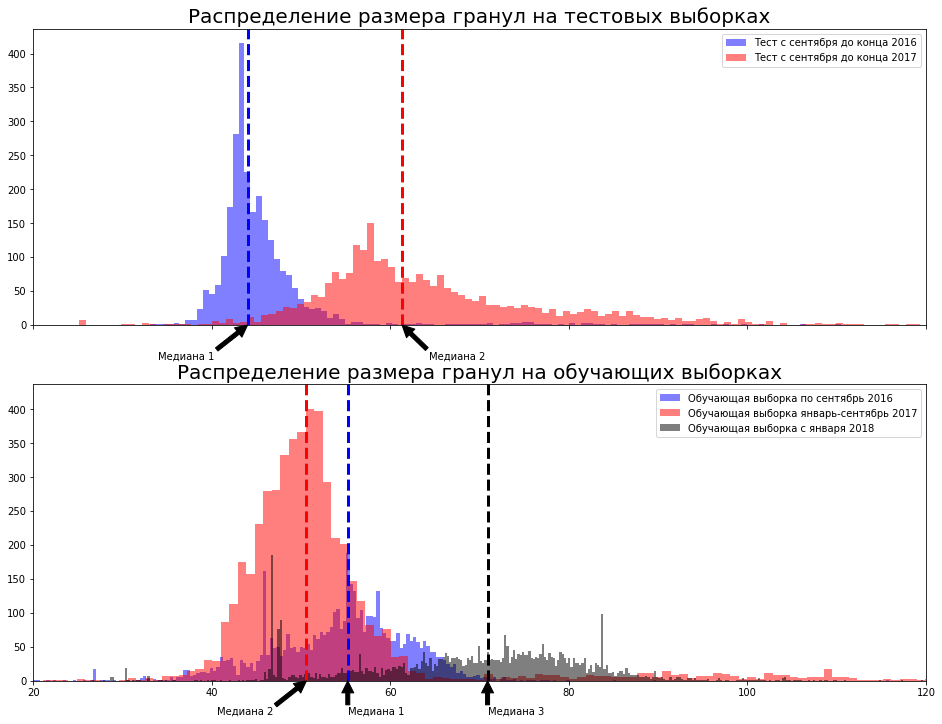

In [36]:
fig, ax = plt.subplots(2,1, figsize = (16,12), sharex=True, sharey=True)
#Выборки с теста
ax[0].hist(test1, bins = 500, alpha = 0.5, color = 'b')
ax[0].hist(test2, bins = 500, alpha = 0.5, color = 'r')
ax[0].legend(['Тест с сентября до конца 2016',
           'Тест с сентября до конца 2017'
          ])
ax[0].axvline(test1.median(), color='b', linestyle='dashed', linewidth=3)
ax[0].axvline(test2.median(), color='r', linestyle='dashed', linewidth=3)
plt.xlim(20,120)
#Выборки с обучения
ax[1].hist(train1, bins = 500, alpha = 0.5, color = 'b')
ax[1].hist(train2, bins = 500, alpha = 0.5, color = 'r')
ax[1].hist(train3, bins = 500, alpha = 0.5, color = 'k')
ax[1].legend(['Обучающая выборка по сентябрь 2016',
           'Обучающая выборка январь-сентябрь 2017',
           'Обучающая выборка с января 2018'
          ])
ax[1].axvline(train1.median(), color='b', linestyle='dashed', linewidth=3)
ax[1].axvline(train2.median(), color='r', linestyle='dashed', linewidth=3)
ax[1].axvline(train3.median(), color='k', linestyle='dashed', linewidth=3)
plt.xlim(20,120)
ax[0].annotate('Медиана 1', 
            xy=(test1.median(), 0), 
            xytext=(test1.median()-10, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[0].annotate('Медиана 2', 
            xy=(test2.median(), 0), 
            xytext=(test2.median()+3, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[1].annotate('Медиана 1', 
            xy=(train1.median(), 0), 
            xytext=(train1.median(), -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[1].annotate('Медиана 2', 
            xy=(train2.median(), 0), 
            xytext=(train2.median()-10, -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[1].annotate('Медиана 3', 
            xy=(train3.median(), 0), 
            xytext=(train3.median(), -50), 
            arrowprops = dict(facecolor='black', shrink=0))
ax[0].set_title('Распределение размера гранул на тестовых выборках', fontsize = 20)
ax[1].set_title('Распределение размера гранул на обучающих выборках', fontsize = 20)

None

In [37]:
display(df_train['rougher.input.feed_size'].describe())
display(df_test['rougher.input.feed_size'].describe())

count    14149.0000000
mean        60.2398560
std         23.0053096
min          9.6595763
25%         48.9667505
50%         55.2697839
75%         66.0075261
max        484.9674665
Name: rougher.input.feed_size, dtype: float64

count    5290.0000000
mean       55.9527540
std        19.0803341
min         0.0463688
25%        43.9065038
50%        50.8468432
75%        62.4511655
max       392.4940402
Name: rougher.input.feed_size, dtype: float64

In [38]:
df['rougher.input.feed_size'].corr(df['final.output.recovery'])

0.042175253449200346

- Видно, что есть незначительное смещение распределения от нормального в сторону увеличения гранул. Также, на тестовой выборке имеется большее значение очень маленьких гранул;
- Квартили общих выборок различаются в пределах 10%, стандартное отклонение отличается в пределах 10%, среднее отличается в пределах 10%;
- Стат тест даже смысла делать нет, огромная разница во входных данных очевидна;
- Вероятно, стоит попробовать настроить модели на общую выборку и, если результат будет плохой, перестроить их на отдельные выборки;
- Линейная кореляция между размером гранул и финальным признаком низкая.

### Суммарные концентрации

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [39]:
df['rougher_conc_sum'] = (df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb'] + 
                         df['rougher.output.concentrate_sol'] + df['rougher.output.concentrate_au'])

df['primary_cleaner_conc_sum'] = (df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_pb'] + 
                                 df['primary_cleaner.output.concentrate_sol'] + df['primary_cleaner.output.concentrate_au'])

df['final_conc_sum'] = (df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] + 
                        df['final.output.concentrate_sol'] + df['final.output.concentrate_au'])

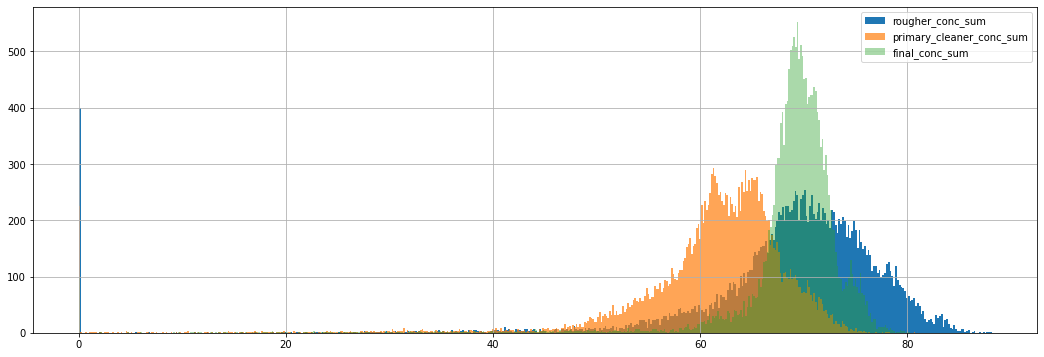

In [40]:
df['rougher_conc_sum'].hist(bins = 500, legend = True, figsize = (18,6))
df['primary_cleaner_conc_sum'].hist(bins = 500, legend = True, alpha = 0.7)
df['final_conc_sum'].hist(bins = 500, legend = True, alpha = 0.4)
plt.show()

- Концентрация сырья после первичной обработки снижается, но после вторичной очистки снова увеличивается до тех же средних значений, что и после флотации;
- При этом размах распределения в финальной концентрации ниже, чем после флотации.

Нам предстоит предсказывать два численных признака:
    
    rougher.output.recovery
    final.output.recovery

Взглянем на них, что они из себя предстваляют.

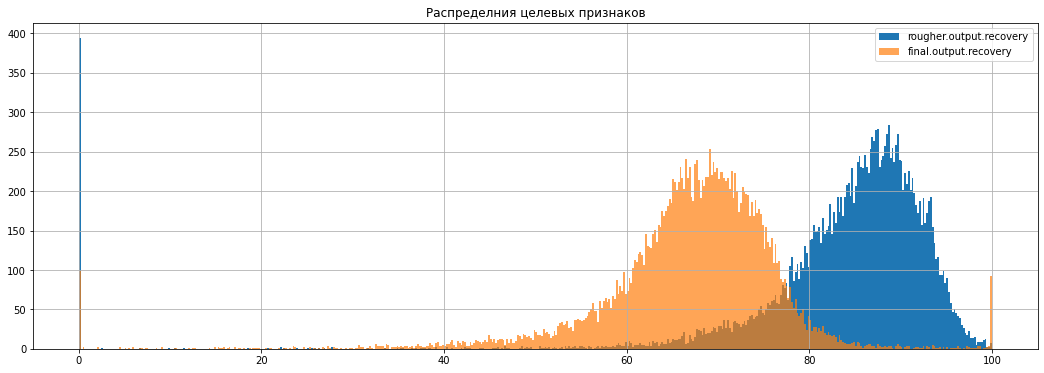

In [41]:
df['rougher.output.recovery'].hist(bins = 500, legend = True, figsize = (18,6))
df['final.output.recovery'].hist(bins = 500, legend = True, alpha = 0.7)
plt.title('Распределния целевых признаков')
plt.show()

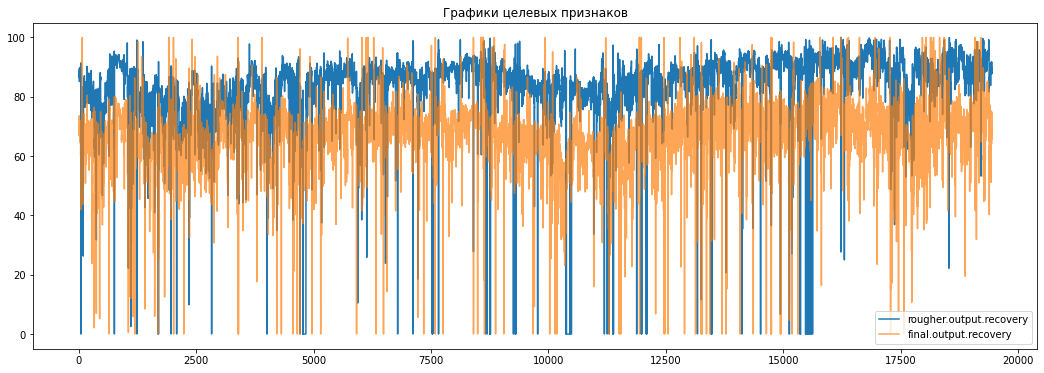

In [42]:
df['rougher.output.recovery'].plot(legend = True, figsize = (18,6))
df['final.output.recovery'].plot(legend = True, alpha = 0.7)
plt.title('Графики целевых признаков')
plt.show()

In [43]:
display(df['rougher.output.recovery'].describe())
display(df['final.output.recovery'].describe())

count    19439.0000000
mean        83.3285874
std         14.1480863
min          0.0000000
25%         81.0379566
50%         86.1888918
75%         90.0106696
max        100.0000000
Name: rougher.output.recovery, dtype: float64

count    19439.0000000
mean        67.0502079
std         10.1258398
min          0.0000000
25%         63.2997124
50%         68.1727378
75%         72.6866415
max        100.0000000
Name: final.output.recovery, dtype: float64

In [44]:
display(df['rougher.output.recovery'].corr(df['final.output.recovery']))

0.32705873241331146

- Видно, что параметры ваимосвязаны, но при этом очень низкая линейная кореляция. Очень много выбросов, где финальная "recovery" становится 100% или падает до 0%;
- К сожалению, реальные технологические процессы так и выглядят. Техника, работающая в реальных условиях, а так же технический персонал, всегда вносят ошибки в данные. С этим нужно жить, а потому удалять такие данные мне кажется неверным;
- Тем не менее необходимо избавиться от данных, в которых суммарная концентрация всех металлов равна нулю.
- Создадим список дат для строк под удаление, потому что в разных наборах данных разные индексы и только даты их объединяют.
Удалим все эти строки и обновим индексы.    

In [45]:
bad_data_date_list = pd.concat([df.query('rougher_conc_sum < 0.01 and primary_cleaner_conc_sum > 0 ')['date'],
                                df.query('primary_cleaner_conc_sum < 0.01 and final_conc_sum > 0 ')['date'], 
                                df.query('rougher_conc_sum != 0 and final_conc_sum < 0.01')['date'],
                                df.query('rougher_conc_sum < 0.01')['date'],
                                df.query('primary_cleaner_conc_sum < 0.01')['date'], 
                                df.query('final_conc_sum < 0.01')['date'],
                                df[(df['final.output.recovery'] < 5)]['date'],
                                df[(df['rougher.output.recovery'] < 5)]['date']
                               ])
bad_data_date_list.drop_duplicates(inplace = True)

In [46]:
df_train = df_train.loc[~df_train['date'].isin(bad_data_date_list)]
df_test = df_test.loc[~df_test['date'].isin(bad_data_date_list)]
df = df.loc[~df['date'].isin(bad_data_date_list)]

 - Убрали аномальные значения из тренировочной и тестовой выборок;
    
 - Обновили индексы.    

## Модель

### Функция вычисления sMAPE

Напишите функцию для вычисления итоговой sMAPE.

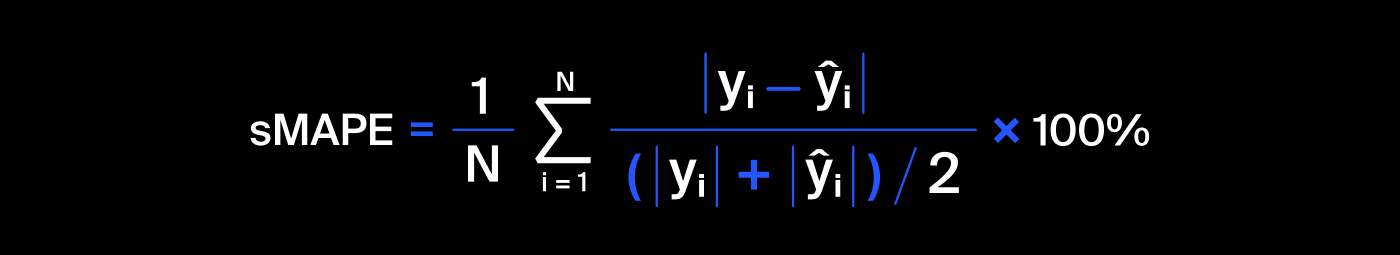

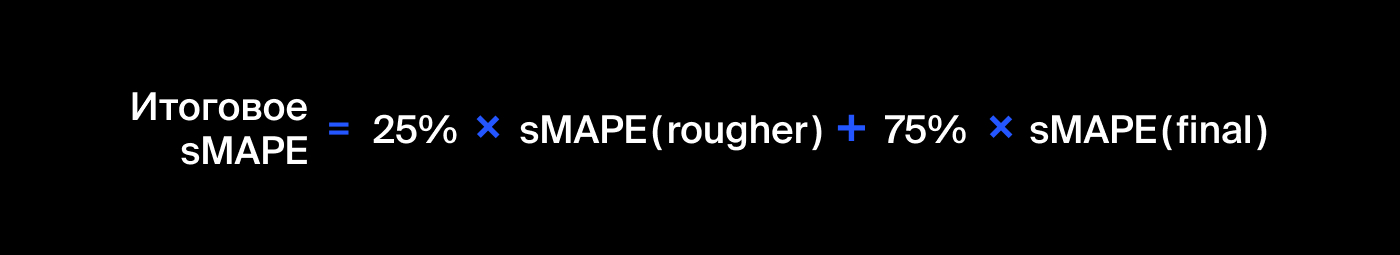

In [47]:
def sMAPE(predict,target):

    
    predict_rougher = predict[:,0]
    target_rougher = target[:,0]
    predict_final = predict[:,1]
    target_final = target[:,1]
    sMAPE_rougher = sum((2*abs(target_rougher-predict_rougher)/(abs(target_rougher)+abs(predict_rougher))))/len(target_rougher)*100
    sMAPE_final = sum((2*abs(target_final-predict_final)/(abs(target_final)+abs(predict_final))))/len(target_final)*100
    sMAPE_total=0.25*sMAPE_rougher+0.75*sMAPE_final
    return sMAPE_total

In [48]:
def smape1(predict_rougher,target_rougher):
    return sum((2*abs(target_rougher-predict_rougher)/(abs(target_rougher)+abs(predict_rougher))))/len(target_rougher)*100

### Обучение моделей
- Обучим модели и оценим их качество с помощью кросс-валидации

- Создадим feature - target из обучающей выборки, создадим кросс-валидацию;
    
- Попробуем простые модели

In [74]:
target = df_train[['rougher.output.recovery','final.output.recovery']] 
features = df_train[df_test.columns] 
features = features.drop(['date'], axis = 1)

In [75]:
rnd = 12345

%%time
MSE_list = []
sMAPE_list = []

sample_size = int(len(features)/5) 

valid_indexes = features.loc[0:0+sample_size].index

for i in range(0, len(features), sample_size):

    valid_indexes = list(range(i,i+sample_size))
    train_indexes = list(range(0,i)) + list(range(i+sample_size, len(features)))
    

    features_train = features.iloc[train_indexes, :]
    features_valid = features.iloc[valid_indexes, :]
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes]

    model1 = DecisionTreeRegressor(random_state=rnd)
    model1.fit(features_train, target_train)
    
    prediction_valid = model1.predict(features_valid)
    target_valid_array = np.array(target_valid)
    

    MSE_score = mean_absolute_error(prediction_valid, target_valid)
    sMAPE_score = sMAPE(target_valid_array, prediction_valid)
    
    MSE_list.append(MSE_score)
    sMAPE_list.append(sMAPE_score)


final_MSE = sum(MSE_list) / len(MSE_list)
final_sMAPE = sum(sMAPE_list) / len(sMAPE_list)

print('Средняя MSE модели:', final_MSE)
print('Средняя sMAPE модели:', final_sMAPE)

```python
%%time
MSE_list = []
sMAPE_list = []

sample_size = int(len(features)/5) 

valid_indexes = features.loc[0:0+sample_size].index

for i in range(0, len(features), sample_size):

    valid_indexes = list(range(i,i+sample_size))
    train_indexes = list(range(0,i)) + list(range(i+sample_size, len(features)))
    

    features_train = features.iloc[train_indexes, :]
    features_valid = features.iloc[valid_indexes, :]
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes]

    model2 = RandomForestRegressor(random_state=rnd)
    model2.fit(features_train, target_train)
    
    prediction_valid = model2.predict(features_valid)
    target_valid_array = np.array(target_valid)
    

    MSE_score = mean_absolute_error(prediction_valid, target_valid)
    sMAPE_score = sMAPE(target_valid_array, prediction_valid)
    
    MSE_list.append(MSE_score)
    sMAPE_list.append(sMAPE_score)


final_MSE = sum(MSE_list) / len(MSE_list)
final_sMAPE = sum(sMAPE_list) / len(sMAPE_list)

print('Средняя MSE модели:', final_MSE)
print('Средняя sMAPE модели:', final_sMAPE)
```

In [51]:
%%time
MSE_list = []
sMAPE_list = []

sample_size = int(len(features)/5) 

valid_indexes = features.loc[0:0+sample_size].index

for i in range(0, len(features), sample_size):

    valid_indexes = list(range(i,i+sample_size))
    train_indexes = list(range(0,i)) + list(range(i+sample_size, len(features)))
    

    features_train = features.iloc[train_indexes, :]
    features_valid = features.iloc[valid_indexes, :]
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes]

    model3 = LinearRegression()
    model3.fit(features_train, target_train)
    
    prediction_valid = model3.predict(features_valid)
    target_valid_array = np.array(target_valid)
    

    MSE_score = mean_absolute_error(prediction_valid, target_valid)
    sMAPE_score = sMAPE(target_valid_array, prediction_valid)
    
    MSE_list.append(MSE_score)
    sMAPE_list.append(sMAPE_score)


final_MSE = sum(MSE_list) / len(MSE_list)
final_sMAPE = sum(sMAPE_list) / len(sMAPE_list)

print('Средняя MSE модели:', final_MSE)
print('Средняя sMAPE модели:', final_sMAPE)

Средняя MSE модели: 6.042616748851306
Средняя sMAPE модели: 9.309638442793002
CPU times: user 2.18 s, sys: 2.92 s, total: 5.1 s
Wall time: 5.06 s


    Пока что лучшая модель - Линейная регрессия

In [52]:
df_for_merge = df[['date', 'rougher.output.recovery','final.output.recovery']] 
df_test = df_test.merge(df_for_merge, on=['date'], how='left') 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5121 entries, 0 to 5120
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5121 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5121 non-null   float64       
 2   primary_cleaner.input.depressant            5121 non-null   float64       
 3   primary_cleaner.input.feed_size             5121 non-null   float64       
 4   primary_cleaner.input.xanthate              5121 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5121 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5121 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5121 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5121 non-null   float64       
 9   primary_

In [53]:
features_test = df_test.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
target_test = df_test[['rougher.output.recovery','final.output.recovery']]

- Обучим модель на всё наборе треннировочных данных

In [54]:
%%time
model3.fit(features, target)

CPU times: user 243 ms, sys: 306 ms, total: 549 ms
Wall time: 475 ms


LinearRegression()

In [55]:
prediction = model3.predict(features_test)

In [56]:
sMAPE_final = sMAPE(np.array(target_test), prediction)
print(f'Финальная метрика нашей модели - {sMAPE_final:.3}')

Финальная метрика нашей модели - 7.54


Лучшей моделью для предсказания целевых признаков является:
    
    LinearRegression().
    
Результат целевой метрики на тестовой выборке:
    
    sMAPE = 7.54

### Проверка модели на адекватность

In [87]:
model_check = DummyRegressor(strategy='constant', constant=[87.5, 70])
model_check.fit(features, target)
prediction_check = model_check.predict(features_test)
sMAPE_final_check = sMAPE(np.array(target_test), prediction_check)
print(f'Финальная метрика по константе - {sMAPE_final_check:.3}')

Финальная метрика по константе - 6.71


### Подытог

    Текущий подход показал, что он хуже константы.
    Изменим подход к подготовки модели.
    
    


### Ограничение обучающей выборки

In [58]:
TRAIN = ['date < "2016-09"', '"2017-01" < date < "2017-09"', '"2018-01" < date'] 
TEST = ['"2016-09" < date < "2017-01"', '"2017-09" < date < "2018-01"']

In [59]:
for x in TRAIN:
    target = df_train.query(x)[['rougher.output.recovery','final.output.recovery']]
    features = df_train.query(x)[df_test.columns]
    features = features.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
    for y in TEST:
        features_test = df_test.query(y).drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
        target_test = df_test.query(y)[['rougher.output.recovery','final.output.recovery']]
        model3 = LinearRegression()
        model3.fit(features, target)
        prediction = model3.predict(features_test)
        sMAPE_final = sMAPE(np.array(target_test), prediction)
        print(f'Метрика ограниченных дата-сетов - {sMAPE_final:.3}')

Метрика ограниченных дата-сетов - 11.3
Метрика ограниченных дата-сетов - 19.9
Метрика ограниченных дата-сетов - 9.16
Метрика ограниченных дата-сетов - 8.53
Метрика ограниченных дата-сетов - 24.2
Метрика ограниченных дата-сетов - 17.9


- Между собой обучающие и тренеровочные выборки так же нстраивают модель хуже константы.

In [60]:
target = df_train.query('"2017-01" < date < "2017-09"')[['rougher.output.recovery','final.output.recovery']]
features = df_train.query('"2017-01" < date < "2017-09"')[df_test.columns]
features = features.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)

In [61]:
features_test = df_test.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis = 1)
target_test = df_test[['rougher.output.recovery','final.output.recovery']]

In [62]:
model3 = LinearRegression()
model3.fit(features, target)
prediction = model3.predict(features_test)
sMAPE_final = sMAPE(np.array(target_test), prediction)
print(f'Финальная метрика нашей модели - {sMAPE_final:.3}')

Финальная метрика нашей модели - 8.84


### Подключение двух моделей и разделение данных

- Используем 2 разные модели, попробуем подобрать параметры с помощью GridSearch;
- Первая модель будет подбирать параметры для этапа флотации;
- Вторая для двух последующих этапов очистки.

In [63]:
colums_rougher = []
for x in df_test:
    if 'rougher' in x:
        colums_rougher.append(x)
colums_rougher.extend(['week','month','year'])
df_train_rougher = df_train[colums_rougher]

In [64]:
colums_final = []
for x in df_test:
    if 'rougher' not in x:
        colums_final.append(x)
df_train_final = df_train[colums_final]

In [65]:
target = df_train_rougher['rougher.output.recovery'] 
features = df_train_rougher.drop(['rougher.output.recovery'], axis = 1)

```python
%%time
clf = RandomForestRegressor()

parametrs = {'n_estimators': range (60, 161, 50),
              'max_depth': range (4,15, 5),
              'min_samples_leaf': range (1,11,4),
              'min_samples_split': range (2,11,4) }
grid = GridSearchCV(clf, parametrs, cv=3, verbose = 0, scoring='neg_mean_absolute_error')
grid.fit(features, target)

grid.best_params_
```

```CPU times: user 3min 12s, sys: 673 ms, total: 3min 12s
Wall time: 3min 14s
{'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}```

In [66]:
model_gs_rougher = RandomForestRegressor(max_depth = 4,min_samples_leaf = 1,min_samples_split = 6,n_estimators = 110)
model_gs_rougher.fit(features, target)

RandomForestRegressor(max_depth=4, min_samples_split=6, n_estimators=110)

In [67]:
features_test_rougher = df_test[features.columns]
target_test_rougher = df_test['rougher.output.recovery']
prediction_rougher = model_gs_rougher.predict(features_test_rougher)
print(f'Метрика sMAPE на этапе флотации - {smape1(prediction_rougher,target_test_rougher):.3}')

Метрика sMAPE на этапе флотации - 4.28


In [68]:
target2 = df_train_final['final.output.recovery'] 
features2 = df_train_final.drop(['date', 'final.output.recovery'], axis = 1)

```python
%%time
clf = RandomForestRegressor()

parametrs = {'n_estimators': range (60, 161, 50),
              'max_depth': range (4,15, 5),
              'min_samples_leaf': range (1,11,4),
              'min_samples_split': range (2,11,4) }
grid = GridSearchCV(clf, parametrs, cv=3, verbose = 0, scoring='neg_mean_absolute_error')
grid.fit(features2, target2)

grid.best_params_
```

```CPU times: user 54min 30s, sys: 4.92 s, total: 54min 35s
Wall time: 54min 40s
{'max_depth': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 60}}```

In [69]:
model_gs_final = RandomForestRegressor(max_depth = 2, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 60)
model_gs_final.fit(features2, target2)
features_test_final = df_test[features2.columns]
target_test_final = df_test['final.output.recovery']
prediction_final = model_gs_final.predict(features_test_final)
print(f'Метрика sMAPE на этапах очистки - {smape1(prediction_final,target_test_final):.3}')

Метрика sMAPE на этапах очистки - 8.59


In [70]:
target_test_full_final = np.stack((target_test_rougher, target_test_final), axis=1)
prediction_test_full_final = np.stack((prediction_rougher, prediction_final), axis=1)

In [71]:
sMAPE_final_new = sMAPE(prediction_test_full_final, target_test_full_final)
print(f'Финальная метрика комбинированной модели - {sMAPE_final_new:.3}')

Финальная метрика комбинированной модели - 7.51


- Пришло время испробовать суперсовременную модель CatBoostRegressor.

In [72]:
%%time
#Первая модель
model_gs_rougher = CatBoostRegressor(verbose = False, loss_function="MAPE")
model_gs_rougher.fit(features, target)

features_test_rougher = df_test[features.columns]
target_test_rougher = df_test['rougher.output.recovery']
prediction_rougher = model_gs_rougher.predict(features_test_rougher)

#Вторая модель
model_gs_final = CatBoostRegressor(verbose = False, loss_function="MAPE")
model_gs_final.fit(features2, target2)

features_test_final = df_test[features2.columns]
target_test_final = df_test['final.output.recovery']
prediction_final = model_gs_final.predict(features_test_final)
#Тестирование
prediction_test_full_final = np.stack((prediction_rougher, prediction_final), axis=1)
sMAPE_final_catboost = sMAPE(target_test_full_final, prediction_test_full_final)
print(f'Финальная метрика комбинированной модели Catboost - {sMAPE_final_catboost:.3}')

Финальная метрика комбинированной модели Catboost - 7.75
CPU times: user 24.3 s, sys: 397 ms, total: 24.7 s
Wall time: 30.3 s


## Вывод

- Данные предоставленных выборок очень сильно меняются с течением времени, а тестовые данные выбраны в середине процесса повышения качества на производстве. Лучшая метрика получена ручным перебором константной модели:


        rougher.output.recovery = 87.5
        final.output.recovery = 70
        sMAPE - 6.71

- Для построения адекватных моделей рекомендуется накапливать большее количество данных без серьёзных технологических изменений и улучшить их качество